In [1]:
import os
import numpy as np
from PIL import Image
import glob
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import cv2

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
with tf.gfile.FastGFile('/gsoc/Src/Custom-Model/lh-radiology-nn-vr-detection/SemanticSegmentation/frozen_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

Instructions for updating:
Use tf.gfile.GFile.


In [41]:
img = cv2.imread('/gsoc/Input/segmented-images/images/cju0u2g7pmnux0801vkk47ivj.jpg')
inp = cv.resize(img, (224, 224))
inp = inp[:, :, [0]] 

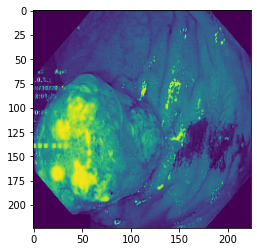

In [43]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(inp))

In [10]:
def display_sample(display_list):
    """Show side-by-side an input image,
    the ground truth and the prediction.
    """
    plt.figure(figsize=(18, 18))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [44]:
img = Image.open('/gsoc/Input/segmented-images/images/cju0u2g7pmnux0801vkk47ivj.jpg')
img1 = img.convert('L')
img1 = img1.resize((224,224))#convert a gray scale
inp = np.expand_dims(img1, axis=-1)

In [35]:
with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    out = sess.run([sess.graph.get_tensor_by_name('Identity:0')],feed_dict={'x:0': inp.reshape(1, inp.shape[0], inp.shape[1], 1)})
    out.shape

AttributeError: 'list' object has no attribute 'shape'

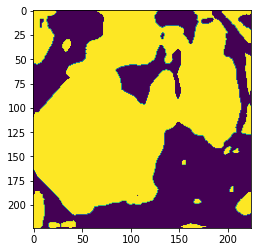

In [40]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(out[0][0]))

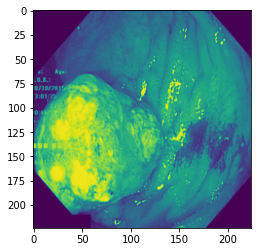

In [45]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(inp))

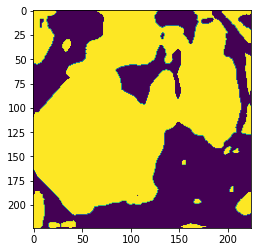

In [48]:
plt.imshow()

In [55]:
imgR = tf.keras.preprocessing.image.array_to_img(out[0][0])
imgRCV = cv2.cvtColor(np.array(imgR), cv2.COLOR_RGB2BGR)